# Exploratory Data Analysis for merged dataset

We will explore the dataset consisting of user's listening activity. The first part of the EDA is exploring the dataset without the Spotify audio features. The purpose of this analysis is to understand the users listening behavior and see if there are any aspects of our data that may skew our recommendations.

* How many different songs does a user actually listen to?
* How many times is each song listened to?
* How many unique users listen to each song?
* Whats the total listen count of each user? 

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import dataset
user_df = pd.read_csv('data/User_SongFeatures_data.csv', compression="xz")

In [35]:
user_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song,id,name,...,instrumentalness,liveness,valence,tempo,type,uri_y,track_href,analysis_url,duration_ms,time_signature
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.0,0.408,0.49,103.992,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4
1,9fba771d9731561eba47216f6fbfc0023d88641b,SOBXHDL12A81C204C0,19,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.0,0.408,0.49,103.992,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4
2,85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b,SOBXHDL12A81C204C0,1,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.0,0.408,0.49,103.992,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4
3,537340ff896dea11328910013cfe759413e1eeb3,SOBXHDL12A81C204C0,2,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.0,0.408,0.49,103.992,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4
4,8fce200f3912e9608e3b1463cdb9c3529aab5c08,SOBXHDL12A81C204C0,2,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.0,0.408,0.49,103.992,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4


In [36]:
user_df.song_id.nunique()

5712

In [37]:
user_df.user_id.nunique()

74899

Before we get into EDA, we want to see if there any songs with multiple song ids.

In [38]:
user_df.song.nunique()

5679

Since there are a different number of unique song id's and unique song names that tells us that there are songs with multiple song id's. 

In [39]:
song_id_count = user_df.groupby('song').nunique()[['song_id']].rename(columns={'song_id':'id_count'}).reset_index()
dups = song_id_count[song_id_count['id_count'] > 1]
print(dups)
print(len(dups))

                                                 song  id_count
12             ...Baby One More Time - Britney Spears         2
378                     Back To Black - Amy Winehouse         2
1033             Damn Girl - The All-American Rejects         2
1241                             Dream On - Aerosmith         2
1246                        Dreamlover - Mariah Carey         2
1324                             Electric Feel - MGMT         2
1582                  Forever & Always - Taylor Swift         2
1784                      Goodbye - Kristinia DeBarge         2
1908                Heads Will Roll - Yeah Yeah Yeahs         2
1923                        Hearts On Fire - Cut Copy         2
2016                   Holes To Heaven - Jack Johnson         2
2077                              Human - The Killers         4
2086                    Hustler - Simian Mobile Disco         2
2173  I Still Haven't Found What I'm Looking For - U2         2
2553                 King Without A Crow

There are 29 songs that have more than one song id. We do not want to treat these songs as separate songs as it will skew our recommendations. We tells us that when we building our model we should use the listen counts of song names rather than song id. 

### How many different songs does a user actually listen to?

We want to explore the distribution of how many different songs each user listens to. For example, we would not have a valid data set for a recommendation engine is 90% of users have only listened to one song.

In [40]:
# explore distribution of how many songs a user actually listens to

song_count = user_df.groupby('user_id').count()[['song_id']].rename(columns={'song_id':'song_count'})
song_count.describe()


,song_count
count,74899.000000
mean,15.226051
std,19.956964
min,1.000000
25%,5.000000
50%,9.000000
75%,18.000000
max,456.000000


In [41]:
len(song_count[song_count['song_count'] == 1])

3372

3372 users in our dataset have only listened to one unique song

Text(0.5, 6.79999999999999, 'Number of unique songs a user listens to')

<Figure size 720x432 with 0 Axes>

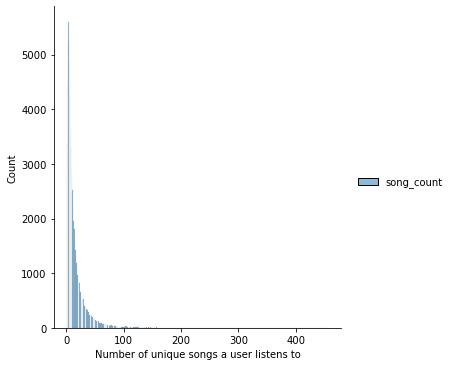

In [42]:
fig1 = plt.figure(figsize=(10,6))

sns.displot(song_count)
plt.xlabel("Number of unique songs a user listens to")

The plot shows that most users listen to less than 100 songs. Let's take a closer look at the box plot of this distribution.

In [43]:
song_count

,song_count
user_id,
00003a4459f33b92906be11abe0e93efc423c0ff,2
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,1
00030033e3a2f904a48ec1dd53019c9969b6ef1f,3
0007235c769e610e3d339a17818a5708e41008d9,7
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,2
...,...
fffce9c1537fbc350ea68823d956eaa8f5236dbe,20
fffd6a2bdef646ce9898b628d5dd56c43df69a9d,3
fffd9635b33f412de8ed02e44e6564e3644cf3c6,12


Text(0.5, 1.0, 'Boxplot of Total Songs a User Has Listened to')

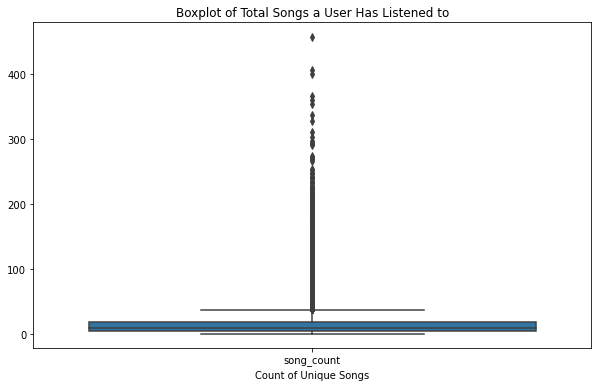

In [44]:
fig2 = plt.figure(figsize=(10,6))

sns.boxplot(data=song_count)
plt.xlabel("Count of Unique Songs")
plt.title("Boxplot of Total Songs a User Has Listened to")

In [45]:
len(song_count[song_count['song_count'] > 300])

10

Since we are building a recommendation system, outliers are treated differently as it is valid data of human activity. Also, the percentage of users that have only listened to one song is low so we can conclude that our data is valid for our model.


### How many times is each song listened to?

Now lets explore the number of times each song is listened to by users. We want to see if there are any outliers so that our analysis is not skewed when recommending songs. For example, we wouldn't want a song to be recommended to users only because it's listen count is considerably higher than all other songs.

In [46]:
# explore distribution of how many times a song is listened to

listen_count = user_df.groupby('song').sum()[['listen_count']]
listen_count.describe()


,listen_count
count,5679.000000
mean,577.460116
std,1065.251983
min,71.000000
25%,219.000000
50%,333.000000
75%,573.500000
max,41418.000000


A song at the 75th percentile is listened to 575 times. The max number of listens is 41,418. Again, this indicates that we have large variance in our data. Let's look at the distribution of the listen counts and zoom in on our outliers.

Text(0.5, 6.79999999999999, 'Number of times a song is listened to')

<Figure size 720x432 with 0 Axes>

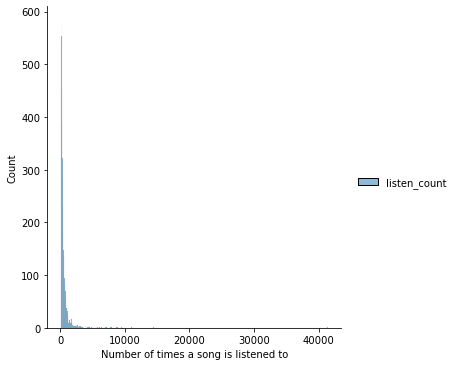

In [47]:
fig3 = plt.figure(figsize=(10,6))

sns.displot(listen_count)
plt.xlabel("Number of times a song is listened to")

Text(0.5, 1.0, 'Boxplot of Song Listen Counts')

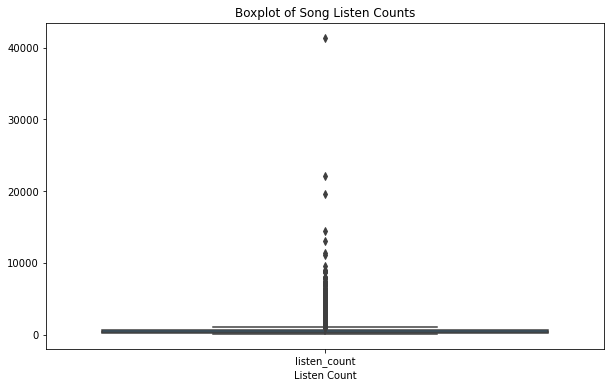

In [48]:
fig4 = plt.figure(figsize=(10,6))

sns.boxplot(data=listen_count)
plt.xlabel("Listen Count")
plt.title("Boxplot of Song Listen Counts")

In [49]:
len(listen_count[listen_count['listen_count'] > 10000])

7

From the boxplot you can see that there are a few songs with very high listen counts. We want to keep these songs in mind during our modeling stage so that they wont be recommended to users just because of their popularity. Do these songs have a lot of people that listen to them, or do a few users listens to these songs very frequently?

Text(0.5, 1.0, 'Most Popular Songs (> 10,000 listens)')

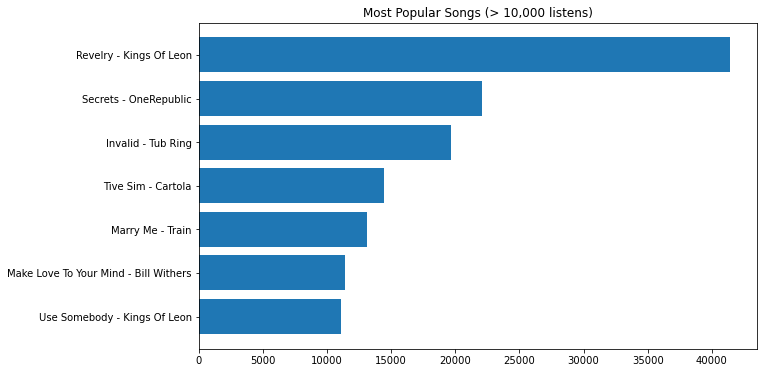

In [50]:
# we'll subset the outliers (songs with listened to over 20000 times)
pop_songs = listen_count[listen_count['listen_count'] > 10000].sort_values('listen_count', ascending = True)

#visualize top songs
fig4 = plt.figure(figsize=(10,6))

plt.barh(pop_songs.index, pop_songs.listen_count)
plt.title("Most Popular Songs (> 10,000 listens)")


In [51]:
user_df[user_df['song'].isin(pop_songs.index)][['user_id', 'song']].groupby('song').count()[['user_id']]

,user_id
song,
Invalid - Tub Ring,2887
Make Love To Your Mind - Bill Withers,1481
Marry Me - Train,3578
Revelry - Kings Of Leon,6145
Secrets - OneRepublic,5841
Tive Sim - Cartola,4548
Use Somebody - Kings Of Leon,3976


### How many unique users listen to each song?

Do these user counts align with the user count distribution of all songs?

In [52]:
user_count = user_df.groupby('song').count()[['user_id']]
print(user_count.describe())
user_song_count = pd.concat([user_count, listen_count], axis=1)

user_song_count.sort_values('listen_count', ascending = False).head(8)

           user_id
count  5679.000000
mean    200.812819
std     280.493818
min      48.000000
25%      90.000000
50%     127.000000
75%     206.000000
max    6145.000000


,user_id,listen_count
song,,
Revelry - Kings Of Leon,6145,41418
Secrets - OneRepublic,5841,22100
Invalid - Tub Ring,2887,19645
Tive Sim - Cartola,4548,14423
Marry Me - Train,3578,13116
Make Love To Your Mind - Bill Withers,1481,11371
Use Somebody - Kings Of Leon,3976,11070
Almaz - Randy Crawford,1710,9524


Text(0.5, 1.0, 'Scatterplot of Song Listen Counts And User Count')

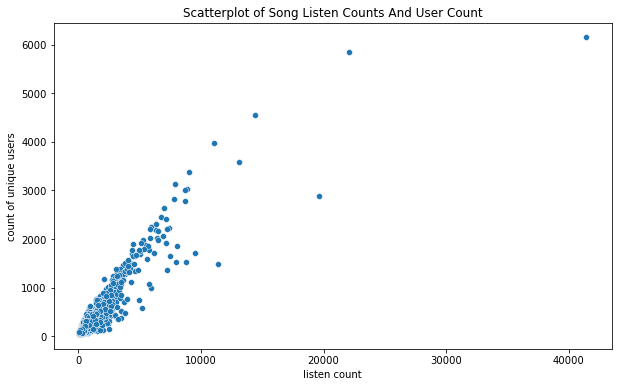

In [53]:
fig4 = plt.figure(figsize=(10,6))

sns.scatterplot(x=user_song_count.listen_count, y=user_song_count.user_id)
plt.xlabel("listen count")
plt.ylabel("count of unique users")
plt.title("Scatterplot of Song Listen Counts And User Count")

The scatterplot shows that there is a relationship between number of listens and number of users. With the exception of a couple of outliers, the number of users that listen to a song increases as the number of listens increases. This tells us that the listen count of our popular songs is not skewed by a few users with extreme listen counts.

### Whats the total listen count of each user? 
Now we want to see the distribution of the amount of times a user listens to any song (total listen count). Again, if a large amount of the users also listen once this could make our dataset not usable for training a recommendation engine.

In [54]:
# explore distribution of the listen count of each user

user_listen_count = user_df.groupby('user_id').sum()[['listen_count']]
user_listen_count.describe()


,listen_count
count,74899.000000
mean,43.784243
std,68.456951
min,1.000000
25%,8.000000
50%,21.000000
75%,51.000000
max,2566.000000


Text(0.5, 6.79999999999999, 'User listen count')

<Figure size 720x432 with 0 Axes>

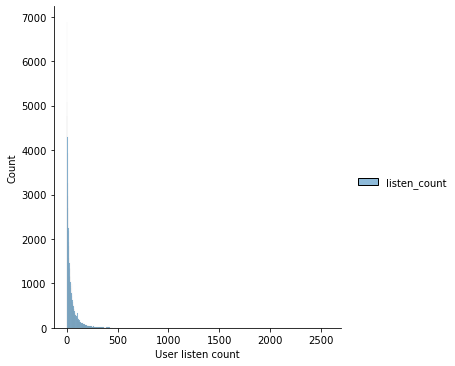

In [55]:
fig4 = plt.figure(figsize=(10,6))

sns.displot(user_listen_count)
plt.xlabel("User listen count")

Text(0.5, 0, 'User listen count')

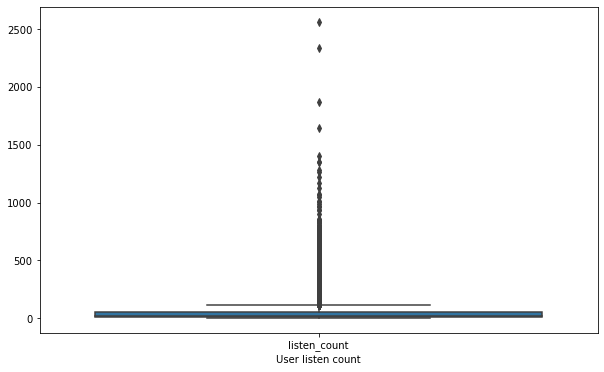

In [56]:
fig4 = plt.figure(figsize=(10,6))

sns.boxplot(data=user_listen_count)
plt.xlabel("User listen count")

In [57]:
len(user_listen_count[user_listen_count['listen_count'] > 1000])

17

In [58]:
len(user_listen_count[user_listen_count['listen_count'] == 1])

2065

Only 2064 users have a listen count of one. This is a low percentage, making our dataset valid for building our model.

This EDA tells us that we have a valid dataset to begin training our recommendation engine. There are some songs that are 'outliers' in regards to listen count however we will not remove these outliers. We will just keep these songs in mind during the modeling stage and make sure they are not recommended to a lot of users solely due to their popularity. 

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import dataset
df = pd.read_csv('data/User_SongFeatures_data.csv', compression="xz")

In [60]:
#get rid of unecessary columns
features_df = df.drop(columns = ['user_id','track_href', 'type', 'uri_y', 'name', 'uri_x', 'id', 'analysis_url'])


In [61]:
# add total listen count of each song

total_listen_count = features_df.groupby('song').sum()[['listen_count']]
listen_df = features_df.merge(total_listen_count, on='song').drop(columns=['listen_count_x']).drop_duplicates('song')

listen_df.song_id.nunique()

5679

In [62]:
listen_df.head()

,song_id,title,release,artist_name,year,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,listen_count_y
0,SOBXHDL12A81C204C0,stronger,Graduation,kanye west,2007,Stronger - Kanye West,0.617,0.717,10,-7.858,0,0.1530,0.005640,0.000000,0.408,0.490,103.992,311867,4,4846
1365,SOBYHAJ12A6701BF1D,constellations,In Between Dreams,jack johnson,2005,Constellations - Jack Johnson,0.705,0.309,1,-12.596,1,0.0363,0.476000,0.000038,0.114,0.426,122.039,201653,4,1287
1922,SODACBL12A8C13C273,learn to fly,There Is Nothing Left To Lose,foo fighters,1999,Learn To Fly - Foo Fighters,0.465,0.919,4,-4.025,1,0.0408,0.000018,0.000021,0.262,0.537,135.997,235293,4,2445
2839,SODXRTY12AB0180F3B,paper gangsta,The Fame Monster,lady gaga,2008,Paper Gangsta - Lady GaGa,0.756,0.841,8,-5.051,1,0.0755,0.049600,0.000001,0.238,0.569,99.008,263360,4,1198
3366,SOFGUAY12AB017B0A8,stacked actors,There Is Nothing Left To Lose,foo fighters,1999,Stacked Actors - Foo Fighters,0.502,0.934,7,-5.145,1,0.0500,0.002030,0.001020,0.234,0.670,134.898,256440,4,267


In [63]:
# popularity of songs in different years 

print(listen_df[listen_df.year != 0].year.min()) # there are years inputted as 0
print(listen_df.year.max())

1955
2010


In [64]:
# aggregate by year 

year_count = listen_df[listen_df.year != 0].groupby('year').sum()[['listen_count_y']].reset_index()
# create buckets for year
year_count['decade'] = (year_count.year//10)*10

year_count.head()

,year,listen_count_y,decade
0,1955,282,1950
1,1956,468,1950
2,1957,474,1950
3,1958,3257,1950
4,1959,1118,1950


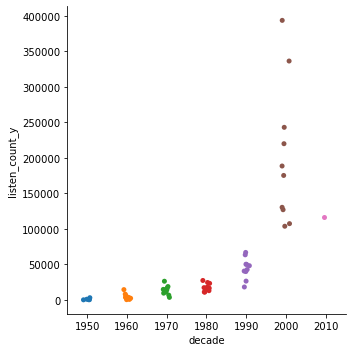

In [65]:
sns.catplot(x="decade", y="listen_count_y", data=year_count)


In [66]:
# group by decade and graph

decade_count = year_count.groupby('decade').sum()[['listen_count_y']].reset_index()


Makes sense that current songs are more popular. 2010's dont have higher listen count than 2000's because data stops at 2012.

In [67]:
dance_count = listen_df.groupby('danceability').sum()[['listen_count_y']].reset_index()
dance_count.head()

,danceability,listen_count_y
0,0.0605,730
1,0.0627,118
2,0.0645,476
3,0.0703,156
4,0.0721,84


<AxesSubplot:xlabel='danceability', ylabel='listen_count_y'>

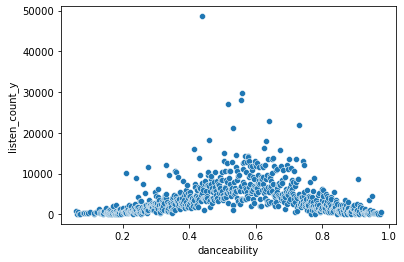

In [68]:
sns.scatterplot(x="danceability", y="listen_count_y", data=dance_count)

<AxesSubplot:xlabel='valence', ylabel='listen_count_y'>

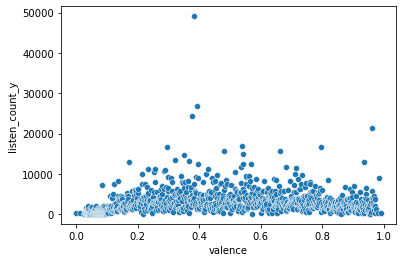

In [69]:
valence_count = listen_df.groupby('valence').sum()[['listen_count_y']].reset_index()
sns.scatterplot(x="valence", y="listen_count_y", data=valence_count)

In [70]:
# instead get most popular songs and look at danceability and valence of those since distribution of songs with certain valence not equal distribution
top_songs = listen_df.sort_values(by='listen_count_y',ascending=False).head(50)
print(top_songs.head())

                   song_id     title                 release    artist_name  \
37184   SOSXLTC12AF72A7F54   revelry       Only By The Night  kings of leon   
31343   SONYKOW12AB01849C9   secrets               Waking Up    onerepublic   
534068  SOUFTBI12AB0183F65   invalid           Fermi Paradox       tub ring   
333358  SOFLJQZ12A6D4FADA6  tive sim        Nova Bis-Cartola        cartola   
43329   SOTWNDJ12A8C143984  marry me  Save Me_ San Francisco          train   

        year                     song  danceability  energy  key  loudness  \
37184   2008  Revelry - Kings Of Leon         0.437   0.748    4    -6.593   
31343   2009    Secrets - OneRepublic         0.516   0.764    2    -6.223   
534068  2002       Invalid - Tub Ring         0.558   0.627    2    -7.613   
333358  1974       Tive Sim - Cartola         0.731   0.540    9   -14.272   
43329   2009         Marry Me - Train         0.461   0.267    0    -8.514   

        mode  speechiness  acousticness  instrumentalnes

(array([ 4.,  2.,  2.,  4., 12.,  8.,  9.,  8.,  0.,  1.]),
 array([0.209 , 0.2789, 0.3488, 0.4187, 0.4886, 0.5585, 0.6284, 0.6983,
        0.7682, 0.8381, 0.908 ]),
 <BarContainer object of 10 artists>)

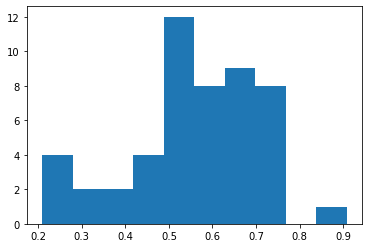

In [71]:
plt.hist(top_songs.danceability)

(array([ 3.,  6., 10.,  8.,  4.,  8.,  6.,  2.,  0.,  3.]),
 array([0.0827 , 0.17283, 0.26296, 0.35309, 0.44322, 0.53335, 0.62348,
        0.71361, 0.80374, 0.89387, 0.984  ]),
 <BarContainer object of 10 artists>)

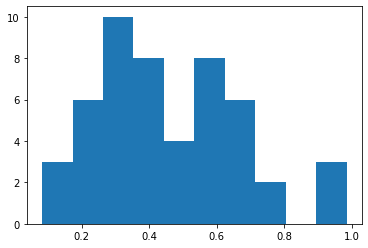

In [72]:
plt.hist(top_songs.valence)

(array([ 2.,  0.,  4.,  3.,  5.,  6., 12.,  5.,  5.,  8.]),
 array([0.267 , 0.3391, 0.4112, 0.4833, 0.5554, 0.6275, 0.6996, 0.7717,
        0.8438, 0.9159, 0.988 ]),
 <BarContainer object of 10 artists>)

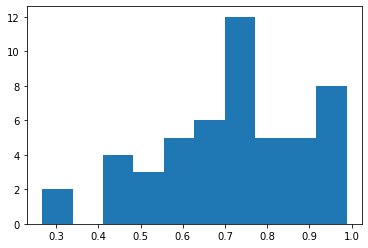

In [73]:
plt.hist(top_songs.energy)

These distributions match the distributions of all the songs available on Spotify